In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [84]:
path = '/Users/liufanling/Library/CloudStorage/OneDrive-个人/1 UC DAVIS/2024 Summer/CSRA/Outputs/SYNGAP_T1/Network/'
file_csv = path + 'Compiled_Networks.csv'
data_df = pd.read_csv(file_csv)
df = data_df.replace(np.NaN,0.0)
df.head()

,Run_ID,DIV,Well,NeuronType,Time,Chip_ID,mean_IBI,cov_IBI,mean_Burst_Peak,cov_Burst_Peak,...,cov_Burst_Peak_Abs,mean_BurstDuration,cov_BurstDuration,MeanNetworkISI,CoVNetworkISI,MeanWithinBurstISI,CoVWithinBurstISI,MeanOutsideBurstISI,CoVOutsideBurstISI,Fanofactor
0,2,4,1,WT,25-Mar-2024 11:32:44,M06691,4.7,0.0,6.319900,47.208081,...,39.472091,0.0,0.0,0.643503,434.337707,0.0,0.0,0.0,0.0,12.348082
1,2,4,2,WT,25-Mar-2024 11:32:44,M06691,0.0,0.0,1.790848,0.000000,...,6.103652,0.0,0.0,0.704565,399.863187,0.0,0.0,0.0,0.0,1.145552
2,2,4,3,WT,25-Mar-2024 11:32:44,M06691,4.3,0.0,6.650891,73.508143,...,36.173039,0.0,0.0,0.552119,433.045731,0.0,0.0,0.0,0.0,10.109046
3,2,4,4,WT,25-Mar-2024 11:32:44,M06691,0.0,0.0,2.041424,0.000000,...,8.845731,0.0,0.0,0.708644,382.388600,0.0,0.0,0.0,0.0,1.540038
4,2,4,5,WT,25-Mar-2024 11:32:44,M06691,4.6,0.0,11.038165,16.298364,...,81.780829,0.0,0.0,0.768388,390.750397,0.0,0.0,0.0,0.0,39.885295


In [55]:
df.columns

Index(['Run_ID', 'DIV', 'Well', 'NeuronType', 'Time', 'Chip_ID', 'mean_IBI',
       'cov_IBI', 'mean_Burst_Peak', 'cov_Burst_Peak', 'Number_Bursts',
       'mean_Spike_per_Burst', 'cov_Spike_per_Burst', 'mean_Burst_Peak_Abs',
       'cov_Burst_Peak_Abs', 'mean_BurstDuration', 'cov_BurstDuration',
       'MeanNetworkISI', 'CoVNetworkISI', 'MeanWithinBurstISI',
       'CoVWithinBurstISI', 'MeanOutsideBurstISI', 'CoVOutsideBurstISI',
       'Fanofactor'],
      dtype='object')

In [56]:
# check div
df['DIV'].unique()

array([ 4,  7, 12, 15, 19, 22, 26, 29])

In [57]:
# subset the data to div 21
df_div22 = df[df['DIV']==22]
df_div22.head()

,Run_ID,DIV,Well,NeuronType,Time,Chip_ID,mean_IBI,cov_IBI,mean_Burst_Peak,cov_Burst_Peak,...,cov_Burst_Peak_Abs,mean_BurstDuration,cov_BurstDuration,MeanNetworkISI,CoVNetworkISI,MeanWithinBurstISI,CoVWithinBurstISI,MeanOutsideBurstISI,CoVOutsideBurstISI,Fanofactor
120,42,22,1,WT,12-Apr-2024 10:16:50,M06691,3.381818,50.272907,8.880980,58.861322,...,101.049790,0.612360,0.0,0.384376,370.112555,0.050801,169.177812,0.156264,125.462304,576.880252
121,42,22,2,WT,12-Apr-2024 10:16:50,M06691,4.906667,43.039000,7.764455,47.900324,...,128.975529,0.606557,0.0,0.587427,360.403179,0.049653,155.239150,0.140333,130.821629,559.064596
122,42,22,3,WT,12-Apr-2024 10:16:50,M06691,4.184507,34.620770,14.132021,43.439196,...,123.787818,0.595833,0.0,0.366864,328.749917,0.040755,147.082851,0.161908,129.965008,1231.780965
123,42,22,4,WT,12-Apr-2024 10:16:50,M06691,5.198246,31.943806,15.191997,21.752343,...,138.947878,0.441379,0.0,0.575639,312.594943,0.031563,126.610618,0.152728,128.408477,1471.093666
124,42,22,5,WT,12-Apr-2024 10:16:50,M06691,6.873810,47.960505,12.572613,49.271544,...,181.841467,0.513953,0.0,0.677824,346.712101,0.038154,156.410051,0.111604,157.506484,1227.447354


In [85]:
# check NeuronType
neuron_types = df['NeuronType'].unique()
neuron_types

array(['WT', 'HET'], dtype=object)

In [86]:
# Bursting columns
num_columns = ['mean_IBI',
       'cov_IBI', 'mean_Burst_Peak', 'cov_Burst_Peak', 'Number_Bursts',
       'mean_Spike_per_Burst', 'cov_Spike_per_Burst', 'mean_Burst_Peak_Abs',
       'cov_Burst_Peak_Abs', 'mean_BurstDuration', 'cov_BurstDuration',
       'MeanNetworkISI', 'CoVNetworkISI', 'MeanWithinBurstISI',
       'CoVWithinBurstISI', 'MeanOutsideBurstISI', 'CoVOutsideBurstISI',
       'Fanofactor']
mean_column = ['mean_IBI',
       'mean_Burst_Peak', 'Number_Bursts',
       'mean_Spike_per_Burst', 'mean_Burst_Peak_Abs',
       'mean_BurstDuration',
       'MeanNetworkISI', 'MeanWithinBurstISI',
       'MeanOutsideBurstISI', 
       'Fanofactor']
cov_burst_column = ['cov_IBI','cov_Burst_Peak', 'cov_Spike_per_Burst', 'cov_Burst_Peak_Abs', 'CoVNetworkISI', 'CoVWithinBurstISI', 'CoVOutsideBurstISI', 'cov_BurstDuration']

In [60]:
# Selected features to analysis
features = ['mean_Burst_Peak', 'Number_Bursts', 'mean_BurstDuration']

Questions: can we select more features? (Need to check correlation between features and avoid choose those featrues have high correlation.)

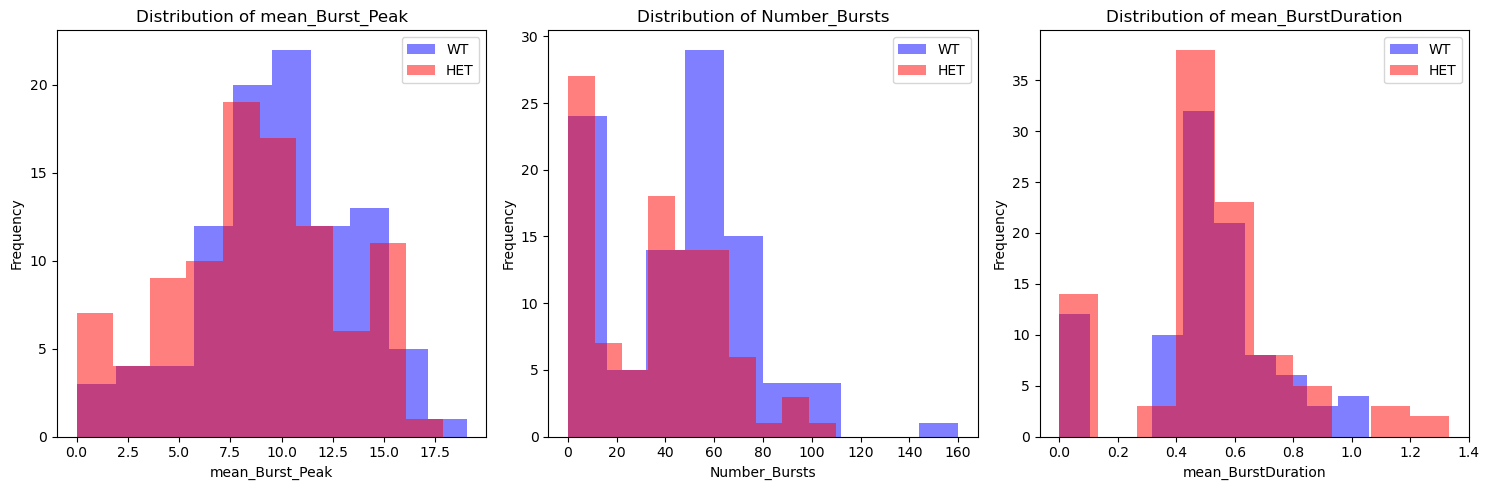

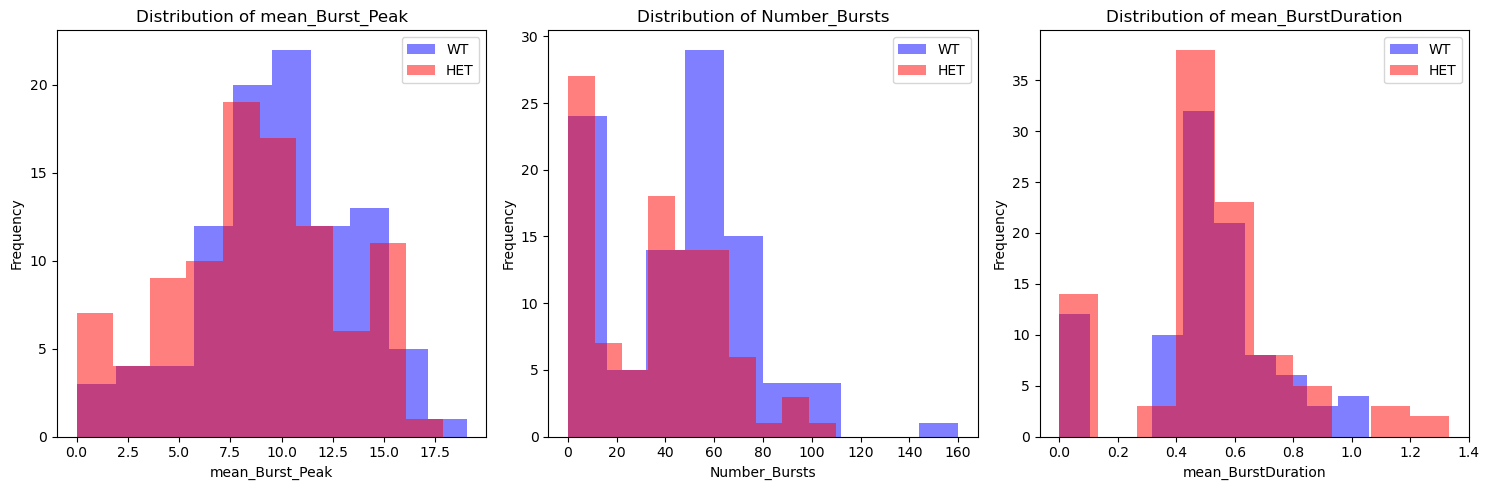

In [61]:
# distribution of features
# color profile
color_map = {}
for n_type in neuron_types:
    if 'WT' in n_type:
        color_map[n_type] = 'blue'
    elif len(color_map) == 1:  # This assumes WT is always there and is the first one to get 'blue'
        color_map[n_type] = 'red'
    else:
        color_map[n_type] = 'grey'

# Plot histograms for each feature across genotypes
for neuron_type in neuron_types:
    # Filter data for the current neuron type
    type_df = df[df['NeuronType'] == neuron_type]

    # Plot histograms for each feature
    fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))
    for i, feature in enumerate(features):
        for n_type in neuron_types:
            subtype_df = df[df['NeuronType'] == n_type]
            axes[i].hist(subtype_df[feature], bins=10, alpha=0.5, label=n_type, color=color_map[n_type])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()

    plt.tight_layout()
    plt.show()

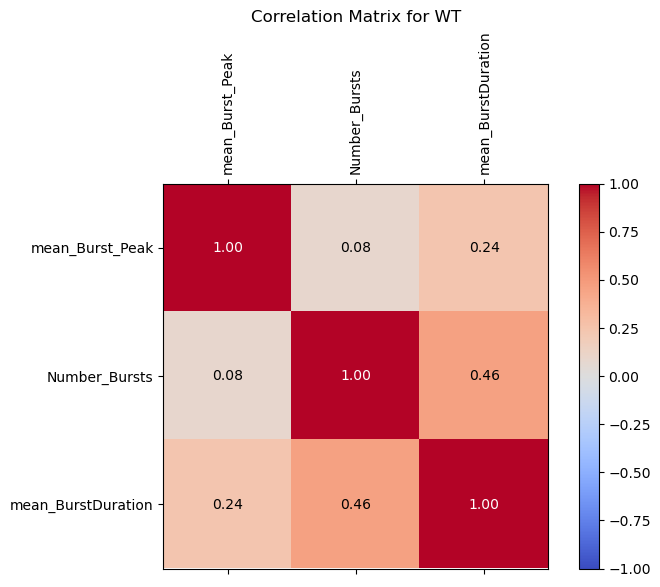

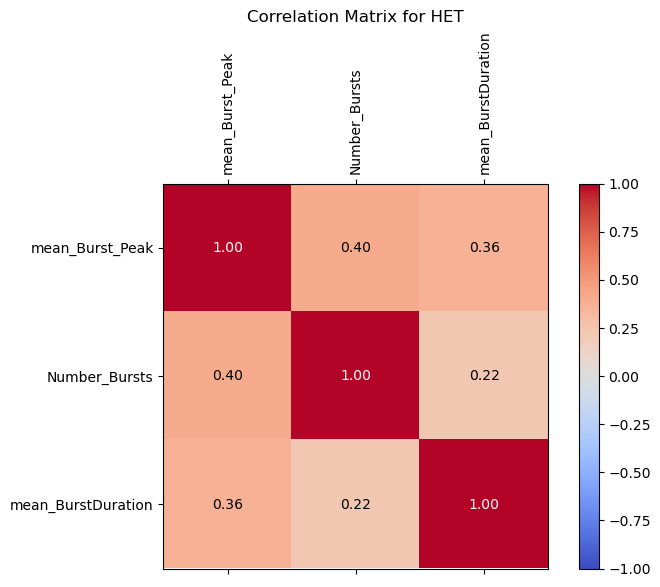

In [87]:
# Plot correlation matrices for each neuron type
for neuron_type in neuron_types:
    # Filter data for the current neuron type
    type_df = df[df['NeuronType'] == neuron_type]
    
    # Calculate correlation matrix
    corr = type_df[features].corr()
    
    # Plotting the correlation matrix
    fig, ax = plt.subplots(figsize=(8, 5))
    cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    plt.xticks(range(len(features)), features, rotation=90)
    plt.yticks(range(len(features)), features)
    plt.colorbar(cax)
    plt.title(f'Correlation Matrix for {neuron_type}')

    # Adding correlation numbers to the plot
    for (i, j), val in np.ndenumerate(corr):
        # Choose text color for readability
        text_color = 'white' if abs(val) > 0.5 else 'black'
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color=text_color)

    plt.show()

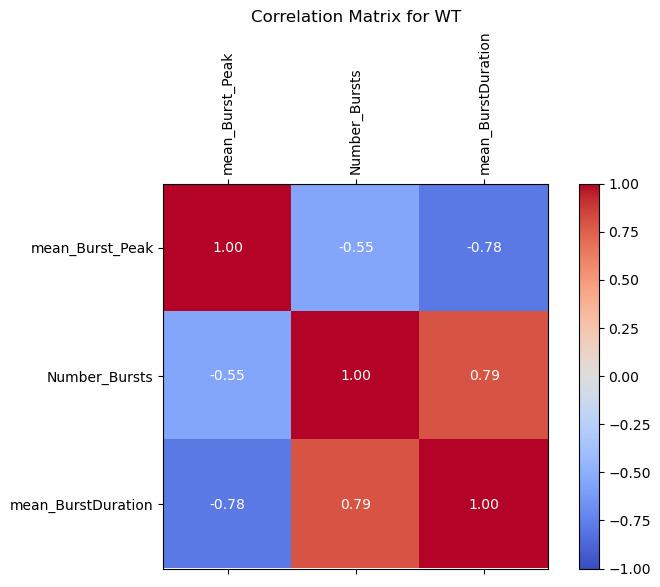

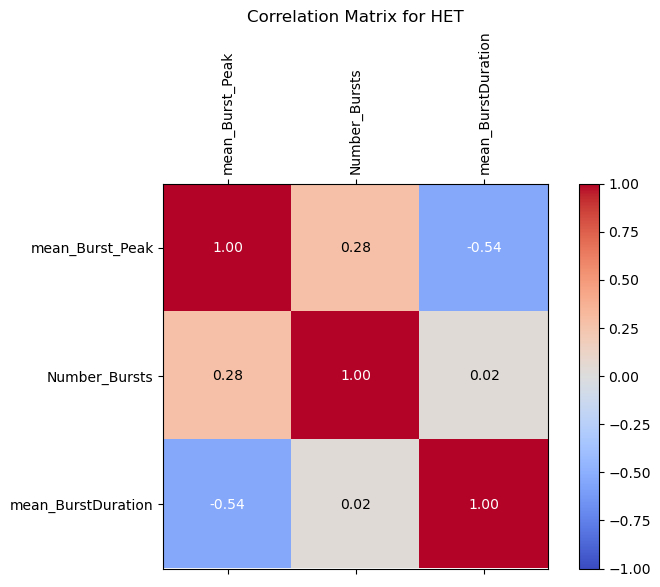

In [76]:
# Plot correlation matrices for each neuron type

for neuron_type in neuron_types:
    # Filter data for the current neuron type
    type_df = df_div22[df_div22['NeuronType'] == neuron_type]
    
    # Calculate correlation matrix
    corr = type_df[features].corr()
    
    # Plotting the correlation matrix
    fig, ax = plt.subplots(figsize=(8, 5))
    cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    plt.xticks(range(len(features)), features, rotation=90)
    plt.yticks(range(len(features)), features)
    plt.colorbar(cax)
    plt.title(f'Correlation Matrix for {neuron_type}')

    # Adding correlation numbers to the plot
    for (i, j), val in np.ndenumerate(corr):
        # Choose text color for readability
        text_color = 'white' if abs(val) > 0.5 else 'black'
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color=text_color)

    plt.show()

Choose a specific div, the correlation increase, should be careful about this. Also, can we apply time series to this problem? 

**PCA (need improvement)**

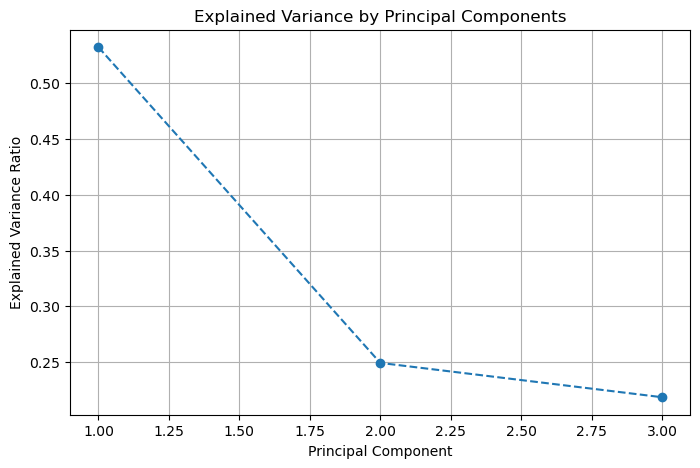

In [63]:
# PCA analysis on burst features
# Standardizing the data
scaler = StandardScaler()
scaler.fit(df[features])
data_scaled = scaler.transform(df[features])

# Performing PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

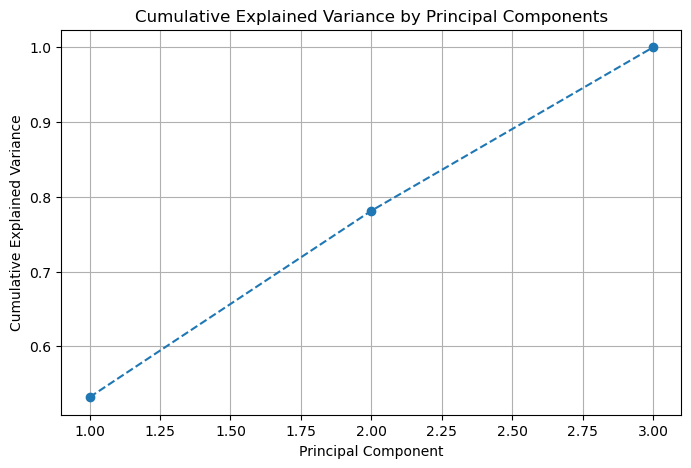

In [64]:
# Cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Plotting the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [65]:
# Principal component scores (i.e., transformed data)
pca_scores = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(len(explained_variance))])

# Principal component loadings (i.e., how much each feature contributes to each PC)
pca_loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(explained_variance))], index=features)

# Display the first few rows of the PCA scores and loadings
pca_scores.head(), pca_loadings

(        PC1       PC2       PC3
 0  2.358596  0.501098 -0.579524
 1  2.999971 -0.357842 -0.240347
 2  2.313169  0.565396 -0.602928
 3  2.965580 -0.309166 -0.258064
 4  1.711032  1.417665 -0.913138,
                          PC1       PC2       PC3
 mean_Burst_Peak    -0.553104  0.782866 -0.284950
 Number_Bursts      -0.574454 -0.606098 -0.550135
 mean_BurstDuration -0.603389 -0.140591  0.784956)

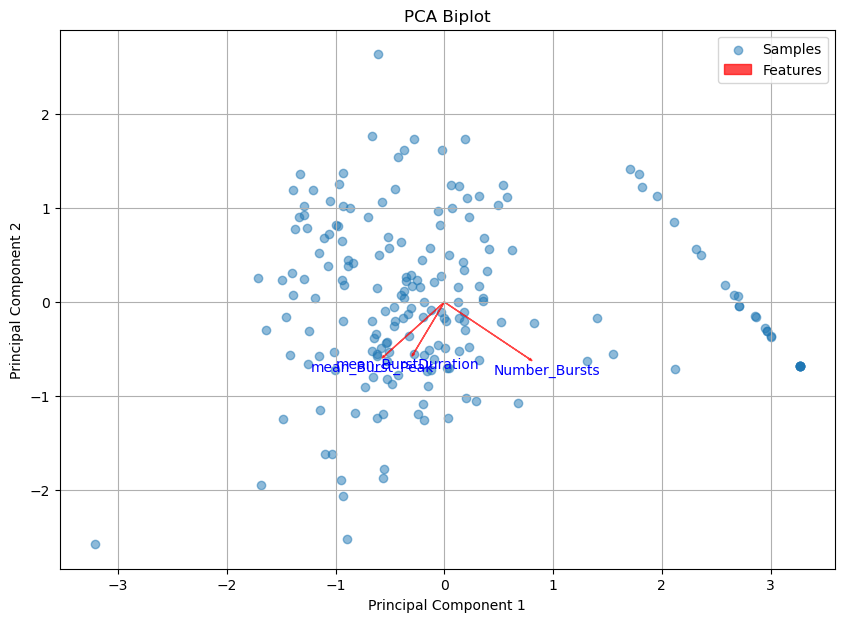

In [66]:
# Creating a biplot
def biplot(scores, loadings, feature_labels, pc1=0, pc2=1):
    plt.figure(figsize=(10, 7))
    
    # Plotting the sample scores
    plt.scatter(scores[:, pc1], scores[:, pc2], alpha=0.5, label='Samples')
    
    # Plotting the feature vectors (loadings)
    for i, feature in enumerate(feature_labels):
        # Ensure the loadings are correctly accessed and plotted
        plt.arrow(0, 0, loadings[i, pc1], loadings[i, pc2], color='r', alpha=0.7, head_width=0.02)
        plt.text(loadings[i, pc1] * 1.2, loadings[i, pc2] * 1.2, feature, color='blue', ha='center', va='center')
    
    plt.xlabel(f'Principal Component {pc1 + 1}')
    plt.ylabel(f'Principal Component {pc2 + 1}')
    plt.title('PCA Biplot')
    plt.grid(True)
    plt.legend(['Samples', 'Features'], loc='best')
    plt.show()

# Correctly plotting the biplot for the first two principal components with feature labels
biplot(pca_result, pca.components_,features)

**Logistic Regression**

In [79]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and preprocess data
file_csv = '/Users/liufanling/Library/CloudStorage/OneDrive-个人/1 UC DAVIS/2024 Summer/CSRA/Outputs/SYNGAP_ALL/Network/Compiled_Networks.csv'
data = pd.read_csv(file_csv)
data = data.replace(np.NaN, 0.0)

# Features and target
X = data[['mean_Burst_Peak', 'Number_Bursts', 'mean_BurstDuration']]
y = data['NeuronType']

# Convert categorical variables to dummy/indicator variables
y_dummy = pd.get_dummies(y, drop_first=False)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_dummy, test_size=0.2, random_state=42)

# Fit the model using statsmodels
X_train_sm = sm.add_constant(X_train)  # Adding a constant for the intercept
model = sm.MNLogit(y_train, X_train_sm)
result = model.fit()

# Display summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.639516
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  307
Model:                        MNLogit   Df Residuals:                      303
Method:                           MLE   Df Model:                            3
Date:                Thu, 15 Aug 2024   Pseudo R-squ.:                 0.07618
Time:                        15:47:58   Log-Likelihood:                -196.33
converged:                       True   LL-Null:                       -212.52
Covariance Type:            nonrobust   LLR p-value:                 4.355e-07
      y=WT       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0783      0.121      0.648      0.517      -0.158       0.315
x1             0.3630      0.

Three features has significance contribute to the logistic model

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load and preprocess data
file_csv = '/Users/liufanling/Library/CloudStorage/OneDrive-个人/1 UC DAVIS/2024 Summer/CSRA/Outputs/SYNGAP_ALL/Network/Compiled_Networks.csv'
data = pd.read_csv(file_csv)
data = data.replace(np.NaN, 0.0)

# Features and target
X = data[['mean_Burst_Peak', 'Number_Bursts', 'mean_BurstDuration']]
y = data['NeuronType']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         HET       0.77      0.60      0.68        45
          WT       0.57      0.75      0.65        32

    accuracy                           0.66        77
   macro avg       0.67      0.68      0.66        77
weighted avg       0.69      0.66      0.66        77



**LDA(to be designed)**

**Features Selection**

**Time Series**